<hr style="border:2px solid #808080"> </hr>
<center><h1 style="color:#173F8A;"> Ecuaciones Diferenciales MAT1640</h1></center>
<center><h1 style="color:#173F8A;"> Capítulo 2: Modelos Matematicos y metodos numericos</h3></center>
<center><h1 style="color:#0176DE;"> Prof. Manuel A. Sánchez</h3></center>
<hr style="border:2px solid #808080"> </hr>

<h1 style="margin-bottom:0.5cm;">Tabla de Contenidos:<span class="tocSkip"></span></h1>
<div class="toc">
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Clase-7:" data-toc-modified-id="Clase 1:">Clase 7:</a>
            </span>
        </li>
    </ul>
</div>


In [1]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML
display(HTML("""<style>.output {display: flex;align-items: center;text-align: center;}</style>"""))

## Clase 7:

### Seccion 2.1

In [2]:
d = {'año': [1800, 1810,1820,1830,1840,1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000],
     'EEUU': [5.308, 7.240, 9.638, 12.861, 17.064, 23.192, 31.443, 38.558, 50.189, 62.980, 76.212, 92.228, 106.022, 123.203, 132.165, 151.326, 179.323, 203.302,226.542,248.710,281.422],
     }
df = pd.DataFrame(data=d)
df

,año,EEUU
0,1800,5.308
1,1810,7.240
2,1820,9.638
3,1830,12.861
4,1840,17.064
5,1850,23.192
6,1860,31.443
7,1870,38.558
8,1880,50.189
9,1890,62.980


### Ajuste de modelo exponencial

$$
P(t) = P_0 \exp(r t), \quad P(0) = 5.308
$$

Estimamos $r$ con $P(100) = 76.212$, obtenemos $r =\frac{1}{100}\ln(\frac{76.212}{5.308})$  

In [3]:
r = 0.01*np.log(76.212/5.308)
P0 = 5.308
Pexp = lambda t: P0*np.exp(r*t) 
tt = df['año'].to_numpy()
tt = tt - tt[0]*np.ones(tt.size)
Pexp_esti = Pexp(tt)
df['exp'] = Pexp_esti
df

,año,EEUU,exp
0,1800,5.308,5.308000
1,1810,7.240,6.928515
2,1820,9.638,9.043768
3,1830,12.861,11.804800
4,1840,17.064,15.408767
5,1850,23.192,20.113013
6,1860,31.443,26.253450
7,1870,38.558,34.268542
8,1880,50.189,44.730615
9,1890,62.980,58.386725


### Ajuste de modelo logistico

$$
P(t) = \frac{P_0 M}{P_0 + (M-P_0)\exp(-kMt)}, \quad P(0) = 5.308
$$

Estimamos $r$ y  $M$ con $P(50) = 23.192$ y $P(100) = 76.212$, obtenemos $k =0.000167716$ y $M=188.121$  

In [26]:
k =0.000167716
M=188.121
P0 = 5.308
Plog = lambda t: P0*M/(P0+(M-P0)*np.exp(-k*M*t))
tt = df['año'].to_numpy()
tt = tt - tt[0]*np.ones(tt.size)
Plog_esti = Plog(tt)
df['logistic'] = Plog_esti
df

,año,EEUU,exp,logistic
0,1800,5.308,5.308000,5.308000
1,1810,7.240,6.928515,7.201661
2,1820,9.638,9.043768,9.734921
3,1830,12.861,11.804800,13.094786
4,1840,17.064,15.408767,17.500496
5,1850,23.192,20.113013,23.192084
6,1860,31.443,26.253450,30.404855
7,1870,38.558,34.268542,39.325941
8,1880,50.189,44.730615,50.034170
9,1890,62.980,58.386725,62.434717


<AxesSubplot:xlabel='año'>

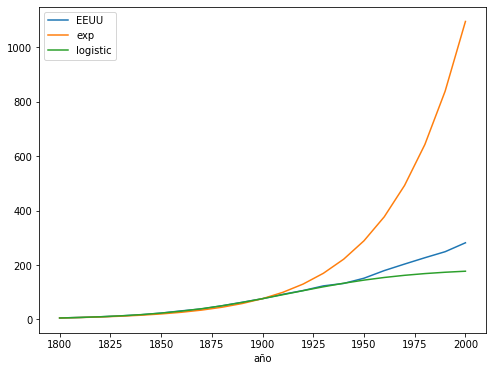

In [58]:
df.plot(0,[1,2,3], figsize=(8,6))

In [55]:
import scipy.optimize
from scipy.integrate import odeint
def sim(variables,t, params):
    P = variables[0]
    
    k = params[0]
    M = params[1]
    
    dPdt = k*P*(M-P)
    
    return ([dPdt])

def loss_function(params, timepoints, cell_counts):
    
    y0 = [cell_counts[0]]
    
    t = np.linspace(timepoints[0], timepoints[-1], num=len(timepoints))
    # use numerical integration 
    #output = odeint(sim,y0,t, args=(params,))
    # use formula of exact solution
    P0 = 5.308
    Plogopt = lambda t: P0*params[1]/(P0+(params[1]-P0)*np.exp(-params[0]*params[1]*t))
    output = Plogopt(t) 
    loss = 0
    
    for i in range(len(timepoints)):
        data_count = cell_counts[i]
        #model_count = output[i,0]
        model_count = output[i]
        
        res = (data_count - model_count)**2
        loss+=res
    return (loss)

params0 = np.array([0.000167716, 188.121])
tt = df['año'].to_numpy()
tt = tt - tt[0]*np.ones(tt.size)
timepoints = tt
cell_counts = df['EEUU'].to_numpy()
minimum = scipy.optimize.fmin(loss_function, params0, args=(timepoints, cell_counts))


Optimization terminated successfully.
         Current function value: 1134.608595
         Iterations: 63
         Function evaluations: 120


In [56]:
kopt = minimum[0]
Mopt = minimum[1]
P0 = 5.308
Plogopt = lambda t: P0*Mopt/(P0+(Mopt-P0)*np.exp(-kopt*Mopt*t))
tt = df['año'].to_numpy()
tt = tt - tt[0]*np.ones(tt.size)
Plogopt_esti = Plogopt(tt)
df['logistic optimize'] = Plogopt_esti
df

,año,EEUU,exp,logistic,logistic optimize
0,1800,5.308,5.308000,5.308000,5.308000
1,1810,7.240,6.928515,7.201661,6.922016
2,1820,9.638,9.043768,9.734921,9.013760
3,1830,12.861,11.804800,13.094786,11.715651
4,1840,17.064,15.408767,17.500496,15.190742
5,1850,23.192,20.113013,23.192084,19.635752
6,1860,31.443,26.253450,30.404855,25.281511
7,1870,38.558,34.268542,39.325941,32.388612
8,1880,50.189,44.730615,50.034170,41.235389
9,1890,62.980,58.386725,62.434717,52.094999


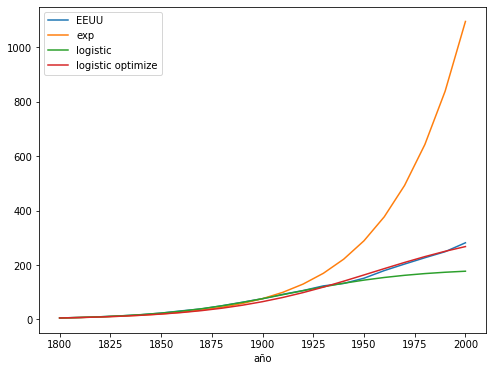

In [57]:
df.plot(0,[1,2,3,4], figsize=(8,6))
plt.show()